# Principal Component Analysis (PCA)

## Brief primer and history
Principal component analysis (PCA) is a statistical procedure that uses an [orthogonal transformation](https://en.wikipedia.org/wiki/Orthogonal_transformation) to convert a set of observations of possibly correlated variables into a set of values of [linearly uncorrelated](https://en.wikipedia.org/wiki/Correlation_and_dependence) variables called principal components. The number of distinct principal components is equal to the smaller of the number of original variables or the number of observations minus one. This transformation is defined in such a way that the first principal component has the largest possible [variance](https://en.wikipedia.org/wiki/Variance) (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is [orthogonal](https://en.wikipedia.org/wiki/Orthogonal) the preceding components. The resulting vectors are an uncorrelated [orthogonal basis set](https://en.wikipedia.org/wiki/Orthogonal_basis_set). 

PCA is sensitive to the relative scaling of the original variables.

PCA was invented in 1901 by [Karl Pearson](https://en.wikipedia.org/wiki/Karl_Pearson) as an analogue of the principal axis theorem in mechanics; it was later independently developed and named by [Harold Hotelling](https://en.wikipedia.org/wiki/Harold_Hotelling) in the 1930s.

## Mathematical details
PCA is mathematically defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.[3]

Consider a data matrix, $\mathbf{X}$, with column-wise zero empirical mean (the sample mean of each column has been shifted to zero), where each of the $n$ rows represents a different repetition of the experiment, and each of the $p$ columns gives a particular kind of feature (say, the results from a particular sensor).

Mathematically, the transformation is defined by a set of p-dimensional vectors of weights or loadings
${\displaystyle \mathbf {w} _{(k)}=(w_{1},\dots ,w_{p})_{(k)}} \mathbf {w} _{(k)}=(w_{1},\dots ,w_{p})_{(k)}$ that map each row vector ${\displaystyle \mathbf {x} _{(i)}} \mathbf{x}_{(i)}$ of $\mathbf{X}$ to a new vector of principal component scores ${\displaystyle \mathbf {t} _{(i)}=(t_{1},\dots ,t_{m})_{(i)}}$ given by

$${\displaystyle {t_{k}}_{(i)}=\mathbf {x} _{(i)}\cdot \mathbf {w} _{(k)}\qquad \mathrm {for} \qquad i=1,\dots ,n\qquad k=1,\dots ,m} {\displaystyle {t_{k}}_{(i)}=\mathbf {x} _{(i)}\cdot \mathbf {w} _{(k)}\qquad \mathrm {for} \qquad i=1,\dots ,n\qquad k=1,\dots ,m}$$

in such a way that the individual variables ${\displaystyle t_{1},\dots ,t_{m}}$ of t considered over the data set successively inherit the maximum possible variance from $\mathbf{x}$, with each loading vector $\mathbf{w}$ constrained to be a unit vector.

In order to maximize variance, the first loading vector $\mathbf {w} _{(1)}$ thus has to satisfy

$$ {\displaystyle \mathbf {w} _{(1)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\sum _{i}\left(t_{1}\right)_{(i)}^{2}\right\}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\sum _{i}\left(\mathbf {x} _{(i)}\cdot \mathbf {w} \right)^{2}\right\}}$$

Equivalently, writing this in matrix form gives

$${\displaystyle \mathbf {w} _{(1)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\{\Vert \mathbf {Xw} \Vert ^{2}\}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\mathbf {w} ^{T}\mathbf {X} ^{T}\mathbf {Xw} \right\}}$$

Since $\mathbf {w} _{(1)}$ has been defined to be a unit vector, it equivalently also satisfies
$${\displaystyle \mathbf {w} _{(1)}={\operatorname {\arg \,max} }\,\left\{{\frac {\mathbf {w} ^{T}\mathbf {X} ^{T}\mathbf {Xw} }{\mathbf {w} ^{T}\mathbf {w} }}\right\}}$$.

With $\mathbf {w} _{(1)}$ found, the first principal component of a data vector $\mathbf {x} _{(i)}$ can then be given as a score $\mathbf {t} _{(i)}$ = $\mathbf {x} _{(i)}$ ⋅ $\mathbf {w} _{(1)}$ in the transformed co-ordinates, or as the corresponding vector in the original variables, {$\mathbf {x} _{(i)}$ ⋅ $\mathbf {w} _{(1)}$} $\mathbf {w} _{(1)}$.

The $k^{th}$ component can be found by subtracting the first $k$ − 1 principal components from $\mathbf{X}$:

$${\displaystyle \mathbf {\hat {X}} _{k}=\mathbf {X} -\sum _{s=1}^{k-1}\mathbf {X} \mathbf {w} _{(s)}\mathbf {w} _{(s)}^{\rm {T}}}$$
and then finding the loading vector which extracts the maximum variance from this new data matrix

$${\displaystyle \mathbf {w} _{(k)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {arg\,max} }}\left\{\Vert \mathbf {\hat {X}} _{k}\mathbf {w} \Vert ^{2}\right\}={\operatorname {\arg \,max} }\,\left\{{\tfrac {\mathbf {w} ^{T}\mathbf {\hat {X}} _{k}^{T}\mathbf {\hat {X}} _{k}\mathbf {w} }{\mathbf {w} ^{T}\mathbf {w} }}\right\}}$$

Computing the [singular value decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition) is now the standard way to calculate a principal components analysis from a data matrix

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read in the data and perform basic exploratory analysis

In [36]:
# Charger le DataFrame initial
x1 = pd.read_csv("../Ressources/Datasets/stand_norm_e1.txt", delimiter='\s+')
x2 = pd.read_csv("../Ressources/Datasets/stand_norm_e2.txt", delimiter='\s+')

# Charger les nouvelles valeurs depuis y2_e1.txt
new_values = pd.read_csv("../Ressources/Datasets/y2_e1.txt", header=None, names=['Class'], delimiter='\s+')

# Concaténer les DataFrames avec les colonnes 'Class' et 'New_Class'
df = pd.concat([new_values, x1, x2], axis=1)

df.head(900)

,Class,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,0.0,35.533354,220.110174,185.322913,714.120693,3719.146472,0.199611,0.807951,31.626118,345.489585,465.024867,353.379868,679.766033,0.199611,1.172721
1,0.0,12.153222,290.799141,371.267847,825.465771,235.087734,0.233832,0.710784,14.583007,297.938838,238.719070,1180.971365,1441.838840,0.233832,0.871765
2,0.0,15.687117,245.596011,432.266516,969.556869,4529.009906,0.266850,0.607620,14.940141,375.341165,439.139407,1028.171307,2469.411191,0.266850,0.786855
3,0.0,4.130666,266.347021,1400.323393,1503.693799,2897.194341,0.298691,0.572977,31.846588,304.508444,594.597040,1049.210472,1477.424605,0.298691,0.852576
4,0.0,1.666385,72.802457,107.825008,1057.444093,2901.767221,0.329382,0.613656,5.950176,94.237243,73.547132,396.930317,669.509993,0.329382,0.856799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1.0,17.208731,148.194510,63.003442,111.243387,2146.133778,0.590211,0.851058,27.640763,474.063547,48.206389,166.360032,460.130158,0.590211,1.134404
896,1.0,4.883533,251.932500,1015.425353,943.971254,1671.002889,0.581489,0.719200,4.322579,367.159016,130.799744,323.640665,994.605693,0.581489,1.198505
897,1.0,5.590907,283.682276,287.911775,1446.697365,3600.282008,0.575397,0.685539,39.685190,441.066522,116.376756,381.380317,650.512390,0.575397,1.149739
898,1.0,9.260278,136.548293,223.010801,577.462713,876.711276,0.568635,0.811406,41.398805,260.769184,160.648854,169.516120,896.395598,0.568635,1.010551


#### Basic statistics

In [37]:
df.iloc[:,1:].describe()
# Basic statistics :
# Ces statistiques fournissent un aperçu de la distribution des données, notamment des mesures centrales, de la dispersion et des valeurs extrêmes.

# Count :
# Permet de vérifier si certaines colonnes ont des valeurs manquantes.
# Mean (moyenne) :
# Donne une idée de la tendance centrale des données.
# Std (écart type) :
# Mesure la dispersion des données autour de la moyenne. Une valeur élevée indique une dispersion importante.
# Min et Max :
# Délimitent la plage des valeurs observées.
# 25%, 50%, 75% (quartiles) :
# Indiquent la répartition des données. La médiane (50%) est la valeur qui divise les données en deux moitiés égales. Les quartiles aident à comprendre la dispersion des valeurs.

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
count,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000
mean,7.717972,105.188312,151.440749,550.201078,1858.966591,0.639482,0.606309,13.895972,151.458379,149.920651,400.832644,1220.819676,0.639482,0.726567
std,13.663121,118.380150,198.971122,596.626663,4357.321074,0.298768,0.355139,25.013573,184.579004,182.028546,427.800726,2480.911004,0.298768,0.402594
min,0.004030,0.497232,1.136887,1.550758,2.000634,0.000000,0.009388,0.008162,1.076040,0.955428,3.392103,7.449574,0.000000,0.006647
25%,0.651348,28.137490,36.205333,160.824792,572.198493,0.407409,0.324037,0.593627,22.237794,36.183844,125.107625,436.950244,0.407409,0.373925
50%,2.563840,73.511859,79.066527,341.954828,1092.019869,0.664452,0.461538,3.255705,83.545856,84.392938,255.556014,768.661462,0.664452,0.567246
75%,9.841582,145.273154,183.969268,722.171973,2030.760318,0.859794,0.844634,17.599500,223.109187,191.940735,518.183014,1335.058697,0.859794,1.063505
max,513.804645,4126.791150,3471.703620,6547.571997,304245.165000,1.932471,1.933941,540.411313,3139.233639,2126.014583,6557.959843,92455.135460,1.932471,1.990678


#### Boxplots by output labels/classes

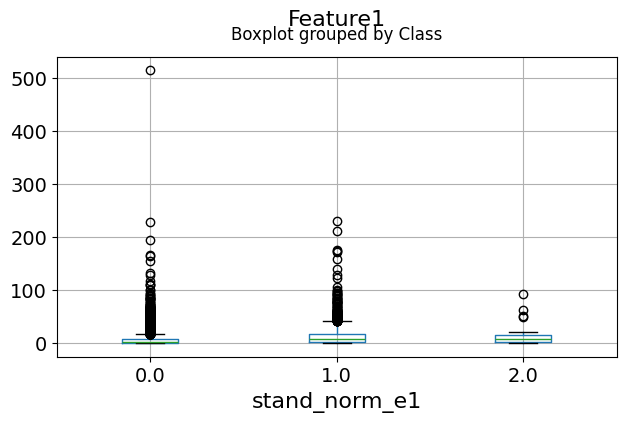

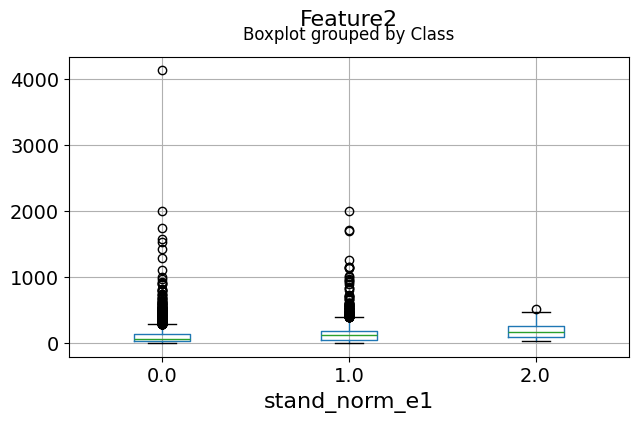

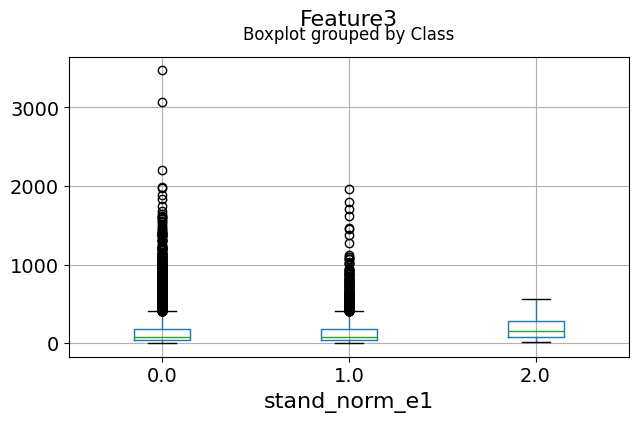

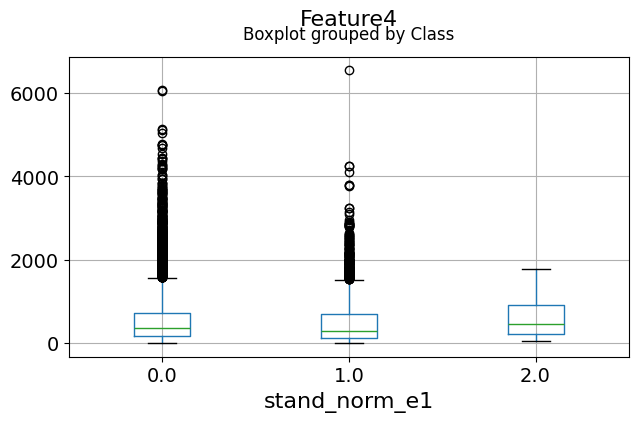

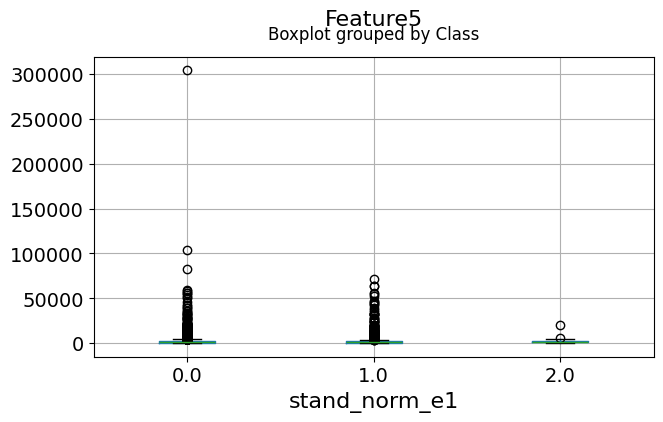

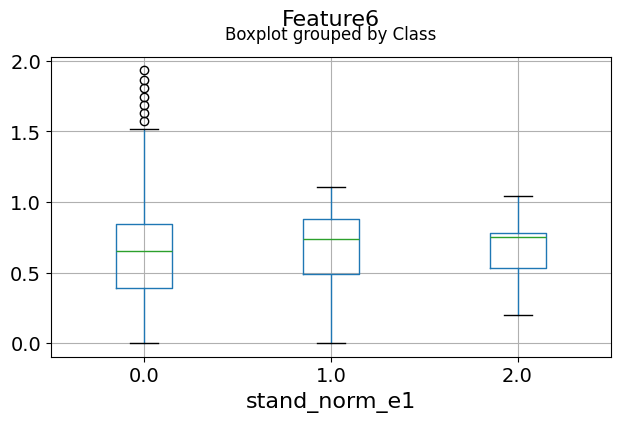

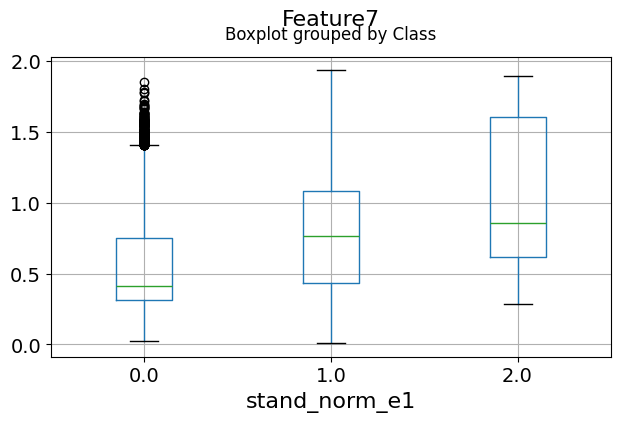

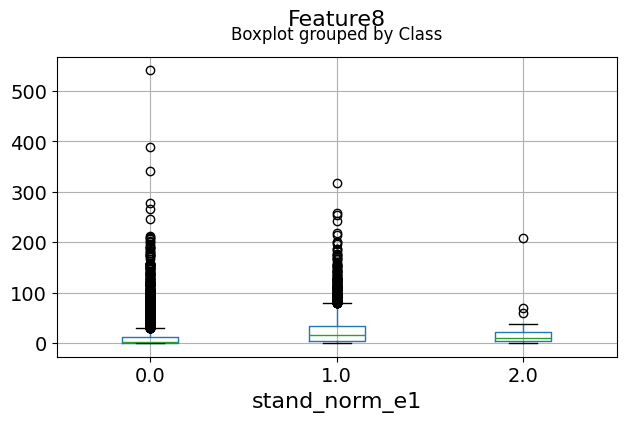

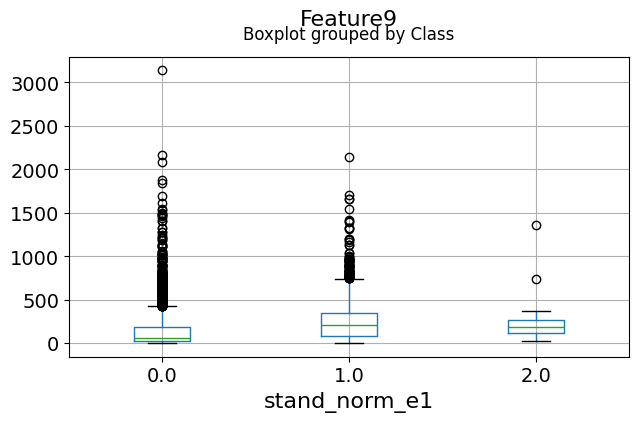

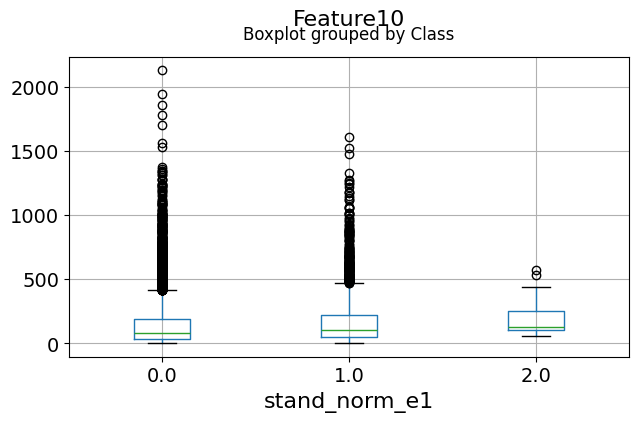

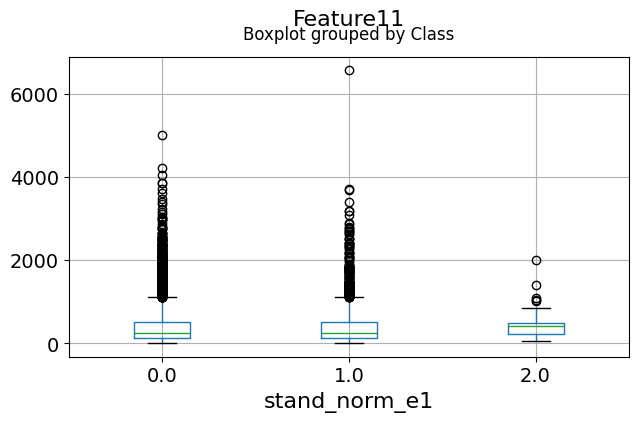

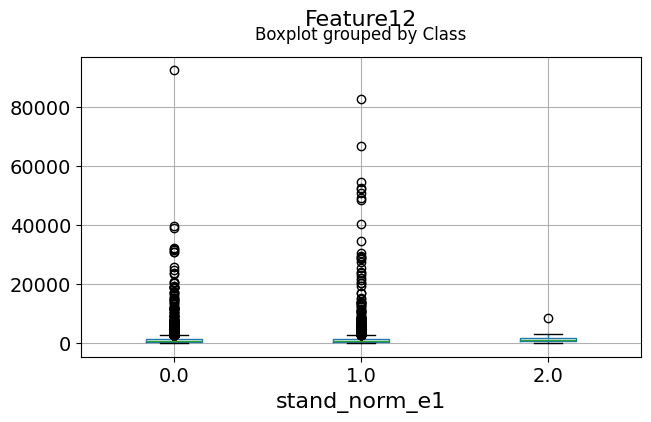

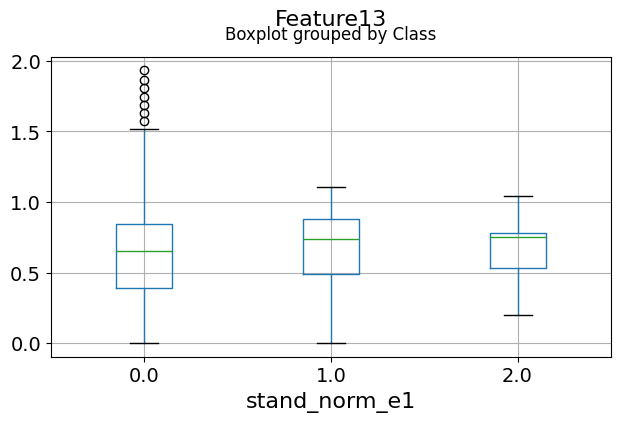

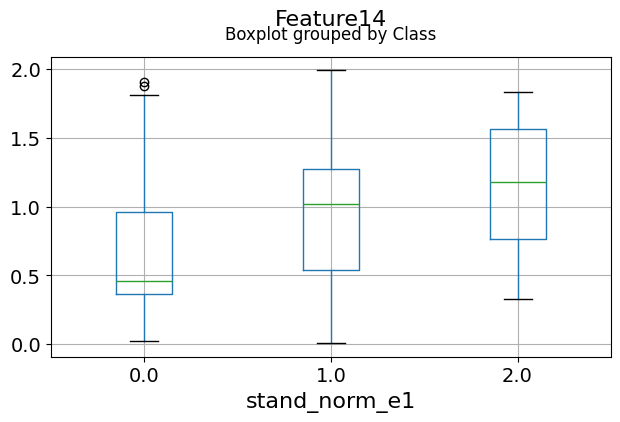

In [38]:
for c in df.columns[1:]:
    df.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("stand_norm_e1", fontsize=16)

#### Are the features independent? Plot co-variance matrix

It can be seen that there are some good amount of correlation between features i.e. they are not independent of each other, as assumed in Naive Bayes technique. However, we will still go ahead and apply yhe classifier to see its performance.

/var/folders/2h/mc0j2yvj7m981sq0zs2tp3zh0000gn/T/ipykernel_3276/3236660946.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 30)
/var/folders/2h/mc0j2yvj7m981sq0zs2tp3zh0000gn/T/ipykernel_3276/3236660946.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels,fontsize=9)
/var/folders/2h/mc0j2yvj7m981sq0zs2tp3zh0000gn/T/ipykernel_3276/3236660946.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(labels,fontsize=9)


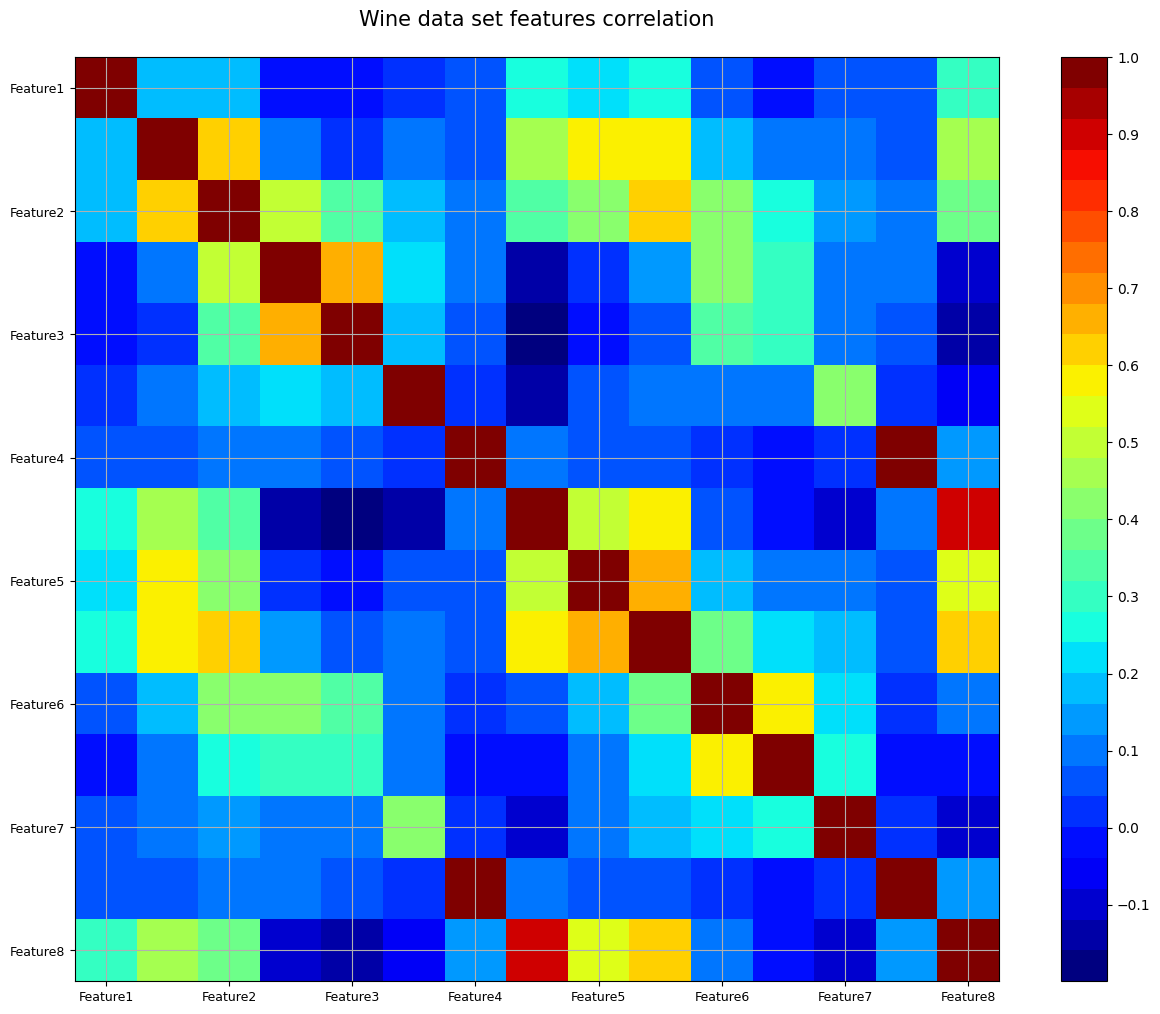

In [39]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)
# Corrélation Matrix :
# La couleur des cellules dans la matrice indique le niveau de corrélation entre les caractéristiques,
# allant du bleu foncé (corrélation négative) au rouge foncé (corrélation positive).

## Principal Component Analysis

### Data scaling
PCA requires scaling/normalization of the data to work properly

In [40]:
#La normalisation des données est cruciale pour le PCA car il est sensible à l'échelle des variables. En normalisant les données, 
#vous vous assurez que chaque variable contribue de manière équitable à l'analyse des composantes principales
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
#Mise à l'échelle des données : La normalisation est effectuée à l'aide du StandardScaler, qui soustrait la moyenne et divise par l'écart type, 
# mettant ainsi toutes les variables à la même échelle.

In [42]:
X = df.drop('Class',axis=1)
y = df['Class']

In [43]:
X = scaler.fit_transform(X)

In [44]:
dfx = pd.DataFrame(data=X,columns=df.columns[1:])
#Création d'un nouveau DataFrame : Un nouveau DataFrame (dfx) est créé avec les données normalisées. 
# Cela facilite la manipulation ultérieure des données dans le cadre du PCA.

In [45]:
dfx.head(10)

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,2.035880,0.970824,0.170293,0.274755,0.426926,-1.472337,0.567804,0.708849,1.051251,1.731138,-0.110927,-0.218095,-1.472337,1.108243
1,0.324627,1.567983,1.104862,0.461386,-0.372693,-1.357793,0.294190,0.027468,0.793623,0.487846,1.823674,0.089091,-1.357793,0.360671
2,0.583282,1.186121,1.411445,0.702905,0.612796,-1.247275,0.003690,0.041746,1.212985,1.588927,1.466485,0.503299,-1.247275,0.149755
3,-0.262564,1.361419,6.276948,1.598202,0.238281,-1.140696,-0.093861,0.717663,0.829217,2.442989,1.515666,0.103436,-1.140696,0.313006
4,-0.442931,-0.273586,-0.219215,0.850218,0.239331,-1.037967,0.020687,-0.317672,-0.310021,-0.419585,-0.009122,-0.222229,-1.037967,0.323496
5,1.302851,0.040955,-0.511584,0.081579,-0.395989,-0.939007,1.200639,0.791928,0.320190,-0.300859,0.371923,-0.344763,-0.939007,0.877880
6,0.502954,0.347292,0.010072,-0.286404,-0.281488,-0.843732,1.316762,-0.185263,0.469988,0.067138,-0.127199,-0.354761,-0.843732,1.290864
7,1.910827,1.712777,-0.210701,0.074656,0.359554,-0.752062,0.544150,1.680606,1.949238,1.955162,0.202919,-0.170337,-0.752062,1.341624
8,1.186646,0.839989,0.497962,0.074816,-0.019508,-0.663910,1.142854,4.280143,2.741084,-0.492710,-0.498726,-0.063472,-0.663910,1.497636
9,2.598098,1.288661,0.095821,0.243654,-0.071131,-0.579199,0.860117,3.459373,3.200802,0.694586,1.063883,-0.213093,-0.579199,1.659458


In [46]:
dfx.describe()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
count,1.281000e+04,1.281000e+04,1.281000e+04,1.281000e+04,1.281000e+04,1.281000e+04,1.281000e+04,1.281000e+04,12810.000000,1.281000e+04,1.281000e+04,12810.000000,1.281000e+04,1.281000e+04
mean,-3.549940e-17,-1.686222e-16,-7.099881e-17,-1.774970e-17,1.331228e-17,-2.795578e-16,1.419976e-16,-1.774970e-17,0.000000,4.437425e-17,-4.437425e-17,0.000000,-2.795578e-16,-7.099881e-17
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039,1.000039e+00,1.000039e+00,1.000039,1.000039e+00,1.000039e+00
min,-5.646033e-01,-8.843980e-01,-7.554349e-01,-9.196232e-01,-4.261881e-01,-2.140476e+00,-1.680875e+00,-5.552326e-01,-0.814763,-8.183938e-01,-9.290682e-01,-0.489102,-2.140476e+00,-1.788274e+00
25%,-5.172244e-01,-6.509016e-01,-5.791791e-01,-6.526552e-01,-2.953233e-01,-7.767950e-01,-7.948529e-01,-5.318258e-01,-0.700110,-6.248539e-01,-6.445426e-01,-0.315973,-7.767950e-01,-8.759583e-01
50%,-3.772442e-01,-2.675929e-01,-3.637565e-01,-3.490531e-01,-1.760202e-01,8.358043e-02,-4.076629e-01,-4.253963e-01,-0.367946,-3.600000e-01,-3.396027e-01,-0.182262,8.358043e-02,-3.957513e-01
75%,1.554325e-01,3.386244e-01,1.634900e-01,2.882500e-01,3.942799e-02,7.374308e-01,6.710996e-01,1.480665e-01,0.388200,2.308524e-01,2.743215e-01,0.046049,7.374308e-01,8.369521e-01
max,3.704179e+01,3.397326e+01,1.668781e+01,1.005253e+01,6.939998e+01,4.327899e+00,3.738486e+00,2.105001e+01,16.187604,1.085638e+01,1.439307e+01,36.775957,4.327899e+00,3.140041e+00


### PCA class import and analysis

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components=None)
#Cette portion de code utilise scikit-learn pour effectuer une PCA non spécifiée en termes de nombre de composantes principales sur 
#les données contenues dans le DataFrame dfx. L'objet PCA ajusté est stocké dans la variable dfx_pca, et
#vous pouvez utiliser ses propriétés pour examiner les résultats de l'analyse en composantes principales.

In [49]:
dfx_pca = pca.fit(dfx)
#la fonction fit de pca sert à estimer les paramètres nécessaires à la transformation des données

#### Plot the _explained variance ratio_

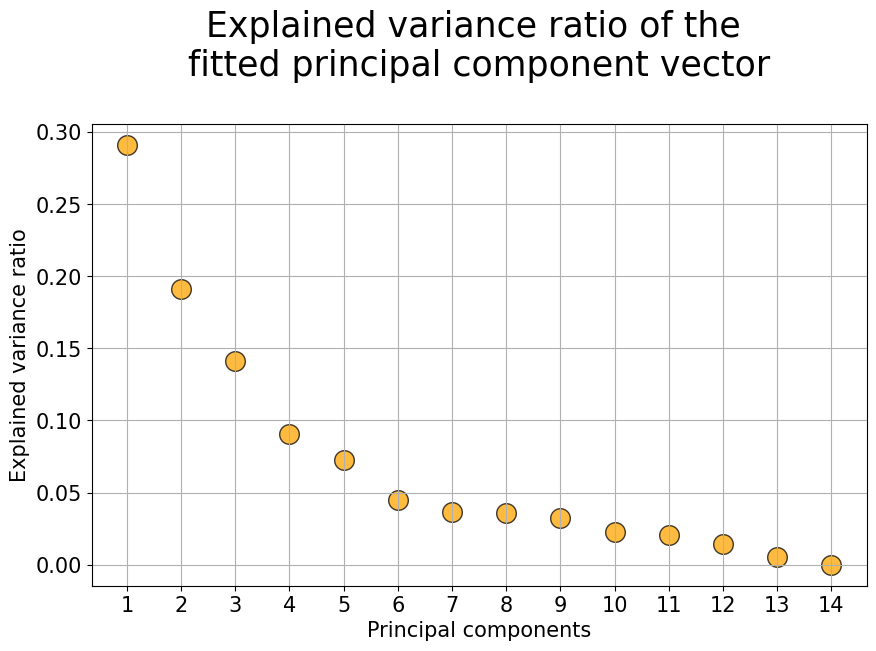

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

#Cela signifie que la première composante principale, si elle est prise seule, capture environ 36% de la variance totale présente dans les données. 
# En d'autres termes, si vous deviez réduire vos données à une seule dimension (la première composante principale), vous conserveriez 36% de l'information/variance totale.

#La deuxième composante principale, si elle est prise seule, capture encore 20% de la variance totale. 
# Donc, en ajoutant la deuxième composante principale à la première, vous augmentez la quantité totale de variance capturée.
#En combinant la première et la deuxième composante principale, vous obtenez un total de 56% de la variance totale expliquée. 
# C'est une façon de mesurer la "qualité" de votre représentation en termes de conservation de l'information dans un espace de dimension inférieure.

**The above plot means that the $1^{st}$ principal component explains about 36% of the total variance in the data and the $2^{nd}$ component explians further 20%. Therefore, if we just consider first two components, they together explain 56% of the total variance.**

### Showing better class separation using principal components

#### Transform the scaled data set using the fitted PCA object

In [51]:
dfx_trans = pca.transform(dfx)

#### Put it in a data frame

In [52]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.593417,0.008878,2.477288,-0.286953,0.494420,0.330044,0.711701,-0.317271,0.465329,1.241666,-0.209006,-0.274954,-0.375800,-5.758472e-16
1,1.649330,1.296490,2.206816,-0.985855,-0.363649,0.019657,-0.112863,-0.619518,-0.486643,-1.069841,0.272528,0.082386,-0.088682,-9.435810e-16
2,2.031949,2.185869,2.121861,-0.336187,-0.301372,-0.132931,0.293849,-0.300959,0.302950,-0.262133,0.151697,-0.389925,-0.035075,-6.543334e-16
3,2.932239,4.755238,1.727059,-2.639088,0.806658,-1.200026,-0.501135,0.315240,1.843392,-1.911517,-2.146843,-0.916599,-0.145810,-7.514679e-16
4,-0.663129,0.088112,1.270072,-0.229786,0.439194,-0.963946,-0.052107,0.111827,-0.607417,0.241145,0.221699,0.125388,-0.197359,-2.624368e-16
5,1.294556,-1.300952,1.523585,-0.290134,0.122938,0.030546,-0.018254,-0.082494,-1.024675,0.340813,-0.388348,-0.165550,0.189664,-3.371398e-16
6,1.093047,-1.181251,1.283078,-0.530974,0.093393,-0.747606,0.077035,-0.787217,0.059442,0.023240,-0.061191,-0.199688,-0.036735,-3.950770e-16
7,3.821300,-0.219370,1.732656,-0.077667,0.029873,0.791424,0.720930,0.337603,0.611893,0.879359,0.402088,0.163462,-0.502540,-3.002867e-16
8,4.155749,-1.781123,1.459649,0.332444,1.224693,0.383702,-0.877722,2.720451,0.087355,-0.749111,-0.207887,-0.107177,-0.036357,1.611978e-16
9,5.206965,-0.938440,1.704870,-0.005133,0.115370,1.217075,0.082875,1.764981,-0.611574,-0.082630,0.180649,-0.681704,-0.355583,-4.921701e-17


#### Plot the first two columns of this transformed data set with the color set to original ground truth class label

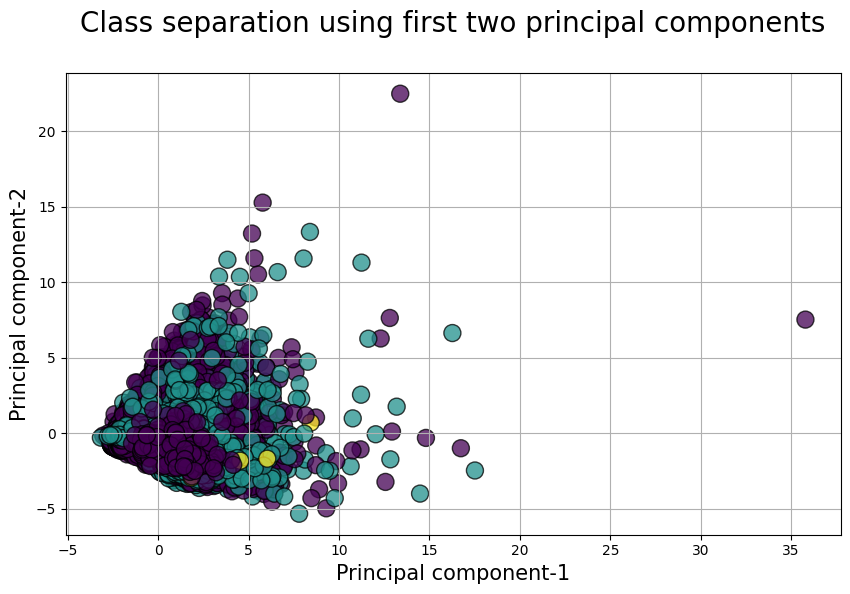

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()
#Affichez le ratio de variance expliquée par chaque composante principale